In [56]:
import pandas as pd
import numpy as np
import joblib



In [57]:
# Read the data
data = pd.read_csv('diabetes.csv')

In [58]:
# Replace zeros with NaN in selected columns
data_copy = data.copy(deep=True)
data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data_copy[
    ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

In [59]:
# Fill NaN values with mean
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(), inplace=True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(), inplace=True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].mean(), inplace=True)
data_copy['Insulin'].fillna(data_copy['Insulin'].mean(), inplace=True)
data_copy['BMI'].fillna(data_copy['BMI'].mean(), inplace=True)

In [60]:
# Split into features (X) and target (y)
X = data_copy.iloc[:, :-1]
y = data_copy.iloc[:, -1]

In [61]:
# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [62]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
# Train and evaluate models
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
models = {
    'Naive Bayes': GaussianNB(),
    'J48 (Decision Tree)': DecisionTreeClassifier(),
    'SVM': SVC()
}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    accuracy = model.score(X_test_scaled, y_test)
    print("{} Test Accuracy: {:.2f}%".format(name, accuracy * 100))

    # Save the best model (SVM in this case)
    if name == 'SVM':
        best_model = model
        joblib.dump(best_model, 'model_joblib_diabetes')

Naive Bayes Test Accuracy: 74.68%
J48 (Decision Tree) Test Accuracy: 70.78%
SVM Test Accuracy: 75.32%


In [64]:
#Making the GUI
from tkinter import *
def show_entry_fields():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())

    result_nb = models['Naive Bayes'].predict([[p1, p2, p3, p4, p5, p6, p7, p8]])
    result_j48 = models['J48 (Decision Tree)'].predict([[p1, p2, p3, p4, p5, p6, p7, p8]])
    result_svm = best_model.predict([[p1, p2, p3, p4, p5, p6, p7, p8]])

    if result_nb == 0:
        Label(master, text="Naive Bayes Prediction: Non-Diabetic").grid(row=31)
    else:
        Label(master, text="Naive Bayes Prediction: Diabetic").grid(row=31)

    if result_j48 == 0:
        Label(master, text="J48 Prediction: Non-Diabetic").grid(row=32)
    else:
        Label(master, text="J48 Prediction: Diabetic").grid(row=32)

    if result_svm == 0:
        Label(master, text="SVM Prediction: Non-Diabetic").grid(row=33)
    else:
        Label(master, text="SVM Prediction: Diabetic").grid(row=33)


master = Tk()
master.title("Diabetes Prediction Using Machine Learning")

label = Label(master, text="Diabetes Prediction Using Machine Learning", bg="black", fg="white")
label.grid(row=0, columnspan=2)

Label(master, text="Pregnancies").grid(row=1)
Label(master, text="Glucose").grid(row=2)
Label(master, text="BloodPressure").grid(row=3)
Label(master, text="SkinThickness").grid(row=4)
Label(master, text="Insulin").grid(row=5)
Label(master, text="BMI").grid(row=6)
Label(master, text="DiabetesPedigreeFunction").grid(row=7)
Label(master, text="Age").grid(row=8)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
nb_pred = models['Naive Bayes'].predict(X_test_scaled)
j48_pred = models['J48 (Decision Tree)'].predict(X_test_scaled)
svm_pred = best_model.predict(X_test_scaled)

In [67]:
nb_cm = confusion_matrix(y_test, nb_pred)
j48_cm = confusion_matrix(y_test, j48_pred)
svm_cm = confusion_matrix(y_test, svm_pred)

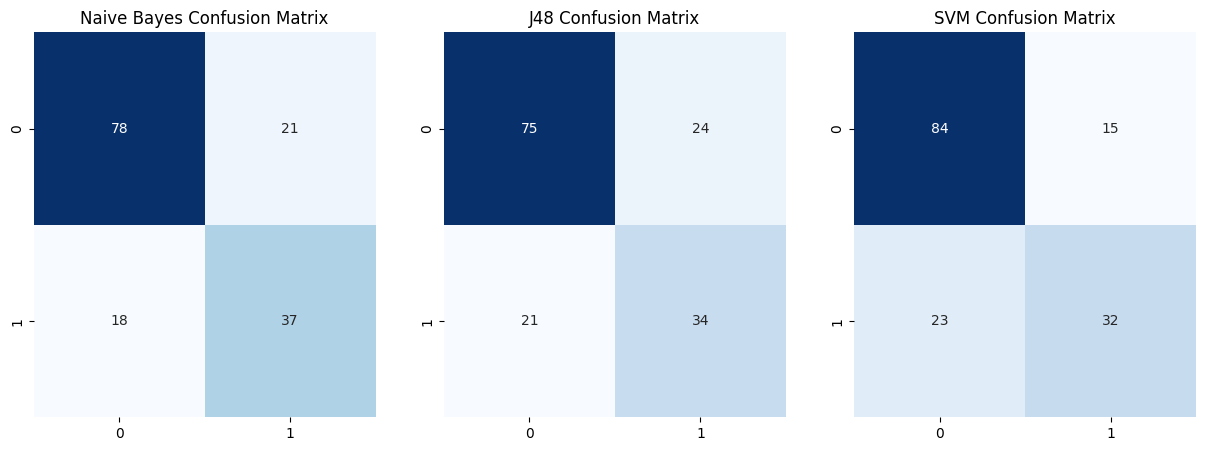

In [68]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Naive Bayes Confusion Matrix")

plt.subplot(1, 3, 2)
sns.heatmap(j48_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("J48 Confusion Matrix")

plt.subplot(1, 3, 3)
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("SVM Confusion Matrix")

plt.show()

In [69]:
from sklearn.metrics import roc_curve, auc

In [70]:
nb_fpr, nb_tpr, _ = roc_curve(y_test, models['Naive Bayes'].predict_proba(X_test_scaled)[:, 1])
j48_fpr, j48_tpr, _ = roc_curve(y_test, models['J48 (Decision Tree)'].predict_proba(X_test_scaled)[:, 1])
svm_fpr, svm_tpr, _ = roc_curve(y_test, best_model.decision_function(X_test_scaled))

nb_auc = auc(nb_fpr, nb_tpr)
j48_auc = auc(j48_fpr, j48_tpr)
svm_auc = auc(svm_fpr, svm_tpr)


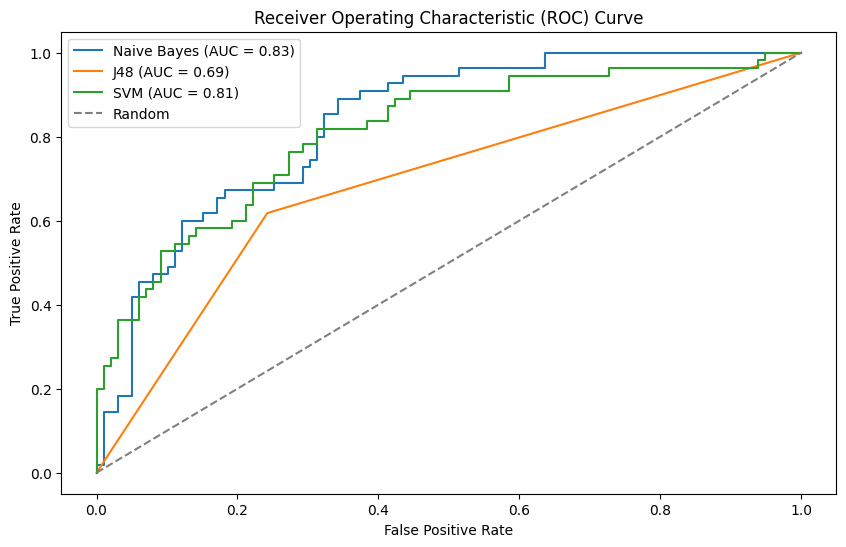

In [71]:
plt.figure(figsize=(10, 6))

plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.2f})')
plt.plot(j48_fpr, j48_tpr, label=f'J48 (AUC = {j48_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

plt.show()







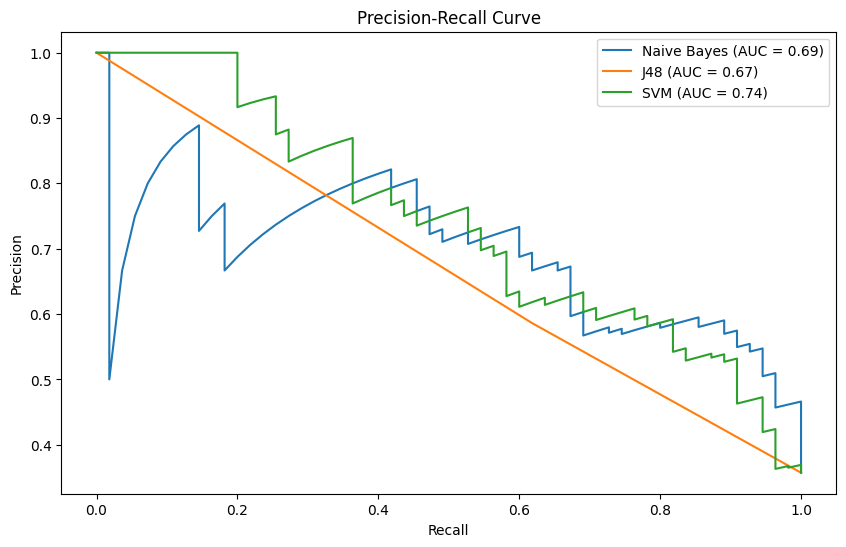

In [72]:
from sklearn.metrics import precision_recall_curve, auc

# Calculate precision-recall curve for each model
nb_precision, nb_recall, _ = precision_recall_curve(y_test, models['Naive Bayes'].predict_proba(X_test_scaled)[:, 1])
j48_precision, j48_recall, _ = precision_recall_curve(y_test, models['J48 (Decision Tree)'].predict_proba(X_test_scaled)[:, 1])
svm_precision, svm_recall, _ = precision_recall_curve(y_test, best_model.decision_function(X_test_scaled))

# Calculate AUC for precision-recall curve
nb_pr_auc = auc(nb_recall, nb_precision)
j48_pr_auc = auc(j48_recall, j48_precision)
svm_pr_auc = auc(svm_recall, svm_precision)

# Plot precision-recall curves
plt.figure(figsize=(10, 6))

plt.plot(nb_recall, nb_precision, label=f'Naive Bayes (AUC = {nb_pr_auc:.2f})')
plt.plot(j48_recall, j48_precision, label=f'J48 (AUC = {j48_pr_auc:.2f})')
plt.plot(svm_recall, svm_precision, label=f'SVM (AUC = {svm_pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.show()

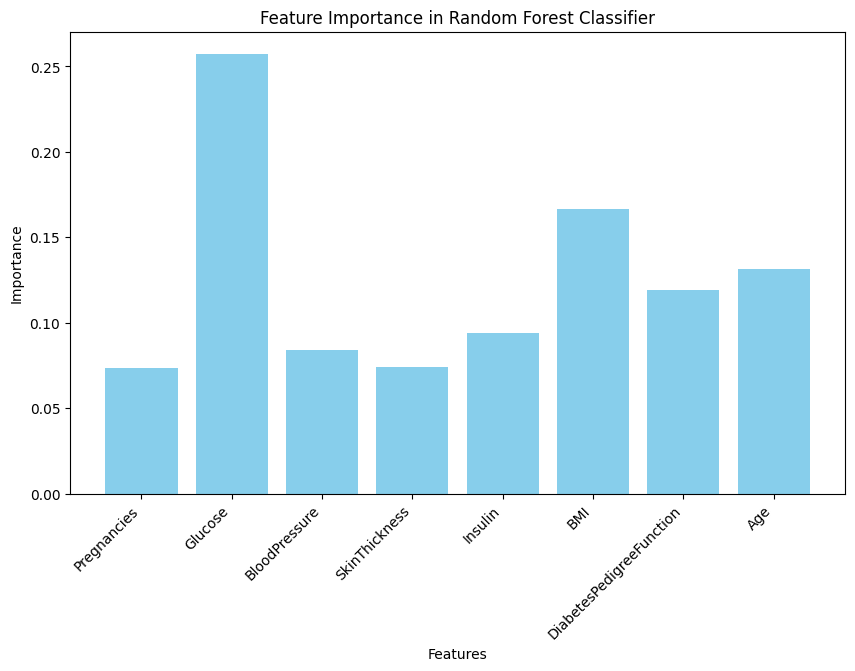

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Feature importance
feature_importance = rf_classifier.feature_importances_

# Bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, feature_importance, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.xticks(rotation=45, ha='right')
plt.show()

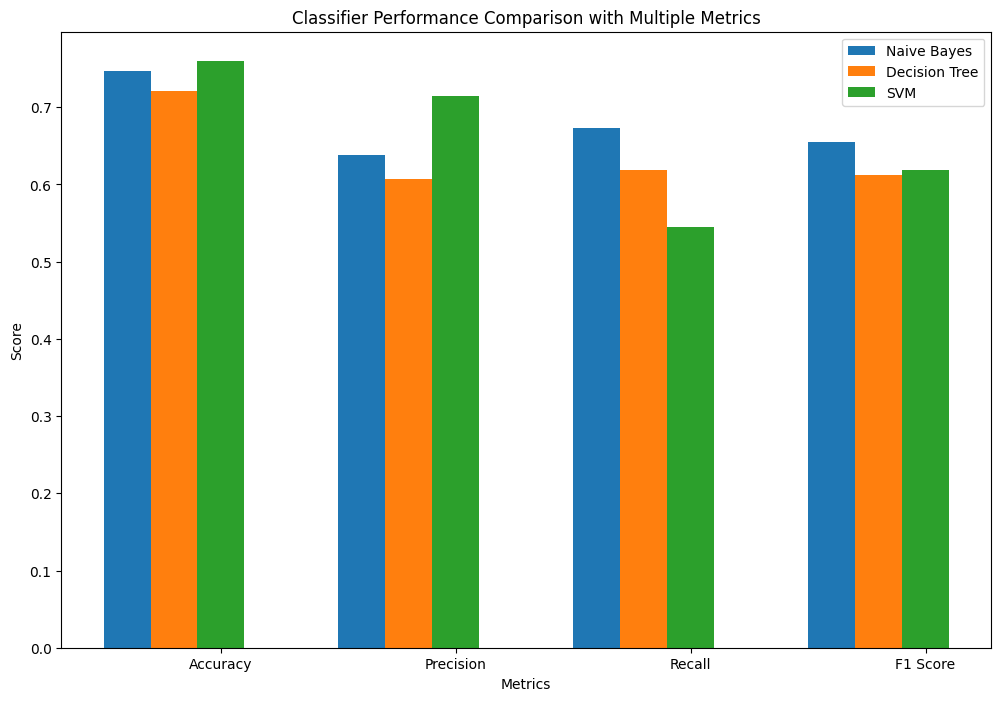

In [86]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have X_train, y_train, X_test, y_test defined
# Assuming scaler is your StandardScaler object

# Initialize classifiers
nb_classifier = GaussianNB()
dt_classifier = DecisionTreeClassifier(random_state=42)
svm_classifier = SVC()

classifiers = {'Naive Bayes': nb_classifier, 'Decision Tree': dt_classifier, 'SVM': svm_classifier}

# Initialize empty lists for metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Calculate metrics for each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Arrange metrics into arrays for each classifier
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
x = np.arange(len(metrics_labels))  # Ensure x has the correct length

bar_width = 0.2

plt.figure(figsize=(12, 8))

for i, (name, _) in enumerate(classifiers.items()):
    plt.bar(x - 1.5 * bar_width + i * bar_width, [accuracy_scores[i], precision_scores[i], recall_scores[i], f1_scores[i]], width=bar_width, label=f'{name}')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Classifier Performance Comparison with Multiple Metrics')
plt.xticks(x + bar_width/2, metrics_labels)
plt.legend()
plt.show()
